## Project | Date - A - Scientist with OKCupid

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

In this capstone, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.


## Setting up the DataFrame.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Loading up the DataFrame and inspecting contents

profiles = pd.read_csv('profiles.csv')
print(len(profiles))
print(profiles.info())
print(profiles.columns)

59946
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19

## Inspecting the columns


In [2]:
#print(profiles['age'].value_counts())
print(profiles['body_type'].value_counts())
print(profiles['diet'].value_counts())
print(profiles['drinks'].value_counts())
print(profiles['drugs'].value_counts())
print(profiles['smokes'].value_counts())
print(profiles['education'].value_counts())
print(profiles['ethnicity'].value_counts())
print(profiles['income'].value_counts())
print(profiles['job'].value_counts())
print(profiles['offspring'].value_counts())
print(profiles['orientation'].value_counts())
print(profiles['religion'].value_counts())
print(profiles['sex'].value_counts())
print(profiles['sign'].value_counts())
print(profiles['speaks'].value_counts())
print(profiles['status'].value_counts())
print(profiles['essay0'].head(3))

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: dri

To find : 
Age histogram split by men and women
Height histogram split by men and women
Orientation by men and women (Side by side pie plot)
Religion vs Seriousness
Signs vs Seriousness
Number of languages by gender
Are the body type statuses different for men and women?
Diet could be combined into kosher, halal, vegan, vegetarian, anything, other and then preference.
Drinks to be converted to an ordinal scale
Drugs to be converted to an ordinal scale.
Smokes to be converted to ordinal scale.
Education could be broken up into Status (graduated, working, dropped out) Type(high school, space camp, two year college, college / university, med school, law school, masters program, phd program, and level (1,2,3,4,5,5,6,7)
Income : Why is it -1
Offsprings - Can be converted to ordinal data
Religion - Can be collapsed into two columns : Religion and Seriousness
Sign - Can be broekn into 2 columns : Sub SIgn and perception
Languages - Can be converted to count of languages using comma separator

## Basic Exploratory Checks


  sex  count
0   f  24117
1   m  35829


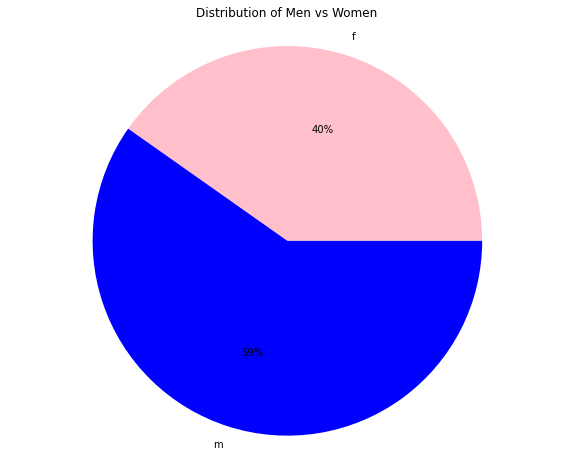

AttributeError: 'Rectangle' object has no property 'normed'

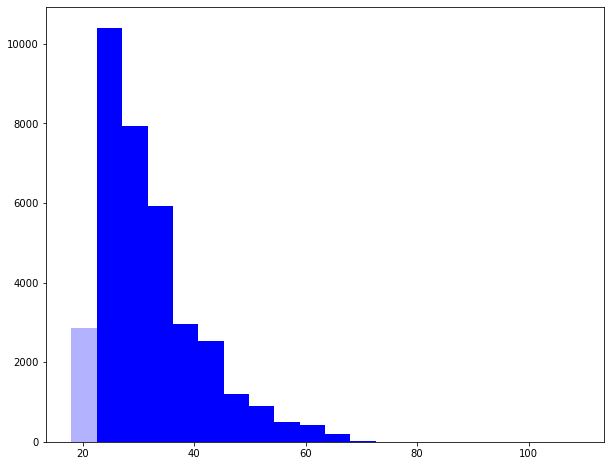

In [3]:
#Proportion of Men and Women

sex_df = profiles.groupby('sex')['age'].count().reset_index()
sex_df.rename(columns = {'age':'count'}, inplace = True)
print(sex_df)

plt.figure(figsize = (10,8))
ax1 = plt.subplot(1,1,1)
plt.pie(sex_df['count'], labels = sex_df['sex'], colors = ['pink', 'blue'], autopct = '%d%%')
plt.axis('equal')
plt.title('Distribution of Men vs Women')
plt.show()

#Age distributions
age_men = profiles[profiles['sex'] == 'm']['age']
age_women = profiles[profiles['sex'] == 'f']['age']

plt.close('all')
plt.figure(figsize = (10,8))
ax2 = plt.subplot(1,1,1)
plt.hist(age_men, alpha = 0.3, color = 'blue', normed = True, bins = 20)
plt.hist(age_women, alpha = 0.4, color = 'orange', normed = True, bins = 20)
plt.legend(['mens ages', 'womens ages'])
plt.title('Age Distributions of Men and Women')
ax2.set_xticks(range(0,110,5))
plt.show()

#Height distributions
height_men = profiles[profiles['sex'] == 'm']['height']
height_women = profiles[profiles['sex'] == 'f']['height']

plt.close('all')
plt.figure(figsize = (10,8))
ax3 = plt.subplot(1,1,1)
plt.hist(height_men, alpha = 0.3, color = 'blue', normed = True, bins = 20)
plt.hist(height_women, alpha = 0.4, color = 'orange', normed = True, bins = 20)
plt.axis([50,100, 0, 0.15])
plt.legend(['mens heights', 'womens heights'])
plt.title('Height Distributions of Men and Women')
ax3.set_xticks(range(50,100,5))
plt.show()

## Sexual Orientation

  sex orientation  counts
0   f    bisexual    1996
1   f         gay    1588
2   f    straight   20533
3   m    bisexual     771
4   m         gay    3985
5   m    straight   31073


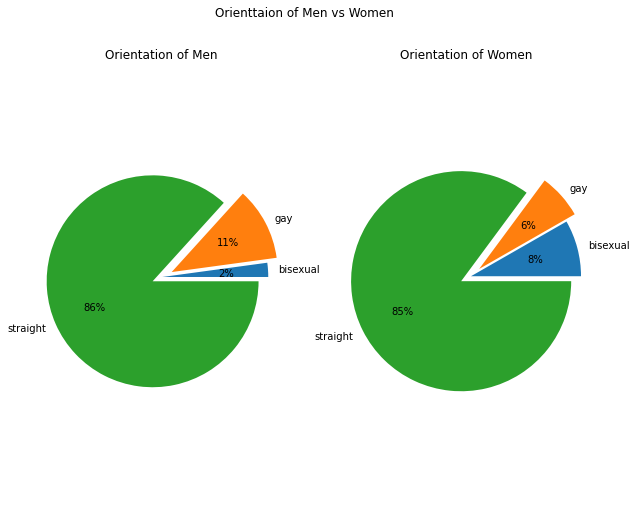

In [4]:
#Is sexual Orientation different by gender?

orientation = profiles.groupby(['sex', 'orientation'])['age'].count().reset_index()
orientation.rename(columns = {'age' : 'counts'}, inplace = True)
print(orientation)

explode = [0,0.1,0.1]

plt.close('all')
plt.figure(figsize = (10,8))
ax4 = plt.subplot(1,2,1)
plt.pie(orientation[orientation['sex'] == 'm']['counts'], labels = orientation[orientation['sex'] == 'm']['orientation'], autopct = '%d%%', explode = explode)
plt.axis('equal')
ax4.set_title('Orientation of Men')
ax5 = plt.subplot(1,2,2)
plt.pie(orientation[orientation['sex'] == 'f']['counts'], labels = orientation[orientation['sex'] == 'f']['orientation'], autopct = '%d%%', explode = explode)
plt.axis('equal')
ax5.set_title('Orientation of Women')
plt.suptitle('Orienttaion of Men vs Women')
plt.show()

In [5]:
#Checkiing if orientation differences between men and women are statistically significant.

orientation_pivot = orientation.pivot(columns = 'orientation',
                                     index = 'sex',
                                     values = 'counts').reset_index()
print(orientation_pivot)

orientation sex  bisexual   gay  straight
0             f      1996  1588     20533
1             m       771  3985     31073


In [6]:
orientation_extract = orientation_pivot[['bisexual', 'gay', 'straight']]
print(orientation_extract)

orientation  bisexual   gay  straight
0                1996  1588     20533
1                 771  3985     31073


In [7]:
contingency = orientation_extract.values.tolist()
print(contingency)
print(type(contingency))

from scipy.stats import chi2_contingency

chi, p, dof, exp = chi2_contingency(contingency)
print(p)

[[1996, 1588, 20533], [771, 3985, 31073]]
<class 'list'>
0.0


Based on above observation, it is clear that men and women have statistically different preferences.


## Augmenting data - Creating Clean columns


Creating columns for Drinks_ordinal, drugs_ordinal, smokes_ordinal, 'Religion', Sign, 'Religious seriosness', 'Sign seriousness' 'Number of languages'

Religion vs Seriousness
Signs vs Seriousness
Number of languages by gender
Drinks to be converted to an ordinal scale
Drugs to be converted to an ordinal scale.
Smokes to be converted to ordinal scale.
Education could be broken up into Status (graduated, working, dropped out) Type(high school, space camp, two year college, college / university, med school, law school, masters program, phd program, and level (1,2,3,4,5,5,6,7)
Income : Why is it -1
Religion - Can be collapsed into two columns : Religion and Seriousness
Sign - Can be broekn into 2 columns : Sub SIgn and perception
Languages - Can be converted to count of languages using comma separator

In [8]:
profiles['sex_int'] = profiles['sex'].map({'f' : 0, 'm' : 1})
profiles['orientation_int'] = profiles['orientation'].map({'straight' : 0, 'bisexual' : 1, 'gay' : 2})
profiles['drinks_ordinal'] = profiles['drinks'].map({'not at all' : 0, 'rarely' : 1, 'socially' : 2, 'often' : 3, 'very often' : 4, 'desperately' : 5})
profiles['drugs_ordinal'] = profiles['drugs'].map({'never' : 0, 'sometimes' : 1, 'often' : 2})
profiles['smokes_ordinal'] = profiles['smokes'].map({'no' : 0, 'when drinking' : 1, 'sometimes' : 2, 'trying to quit' : 3, 'yes' : 4})
religion_temp = profiles['religion'].str.split(' ')
profiles['religion_clean'] = religion_temp.str[0]
profiles['religion_int'] = profiles['religion_clean'].map({'agnosticism' : 0, 'other' : 1, 'atheism' : 2, 'christianity' : 3, 'catholicism' : 4, 'judaism' : 5, 'buddhism' : 6, 'hinduism' : 7, 'islam' : 8})
sign_temp = profiles['sign'].str.split(' ')
profiles['signs_clean'] = sign_temp.str[0]
profiles['languages_count'] = (profiles['speaks'].str.count(',')) + 1

#print(profiles['religion_clean'].head())
#print(profiles['signs_clean'].head())
#print(temp_lang)
#print(profiles['count_languages'].head())

def findedu(x) : 
    phd = 'ph.d' in x
    masters = 'masters' in x
    law_school = 'law school' in x
    med_school = 'med school' in x
    university = 'university' in x
    two_year = 'two-year' in x
    space_camp = 'space camp' in x
    high_school = 'high school' in x
    
    if phd == True : 
        return 7
    elif masters == True : 
        return 6
    elif law_school == True : 
        return 5
    elif med_school == True : 
        return 5
    elif university == True : 
        return 4
    elif two_year == True : 
        return 3
    elif space_camp == True : 
        return 2
    elif high_school == True : 
        return 1
    
profiles['education_clean'] = profiles['education'].apply(lambda x : findedu(str(x)))


def how_serious(x) : 
    laughing = 'laughing' in x
    not_too_serious = 'not too' in x
    somewhat_serious = 'somewhat' in x
    very_serious = 'very serious' in x
 
    if laughing == True : 
        return 'No'
    elif not_too_serious == True : 
        return 'No'
    elif somewhat_serious == True : 
        return 'Yes'
    elif very_serious == True : 
        return 'Yes'
    elif x == 'nan' :
        return float('nan')
    else : 
        return 'No'

profiles['religious_seriousness'] = profiles['religion'].apply(lambda x : how_serious(str(x)))

#print(profiles['religion'].head())
print(profiles['religion_clean'].value_counts())
print(profiles['religion_int'].value_counts())
print(profiles['religious_seriousness'].value_counts())

def dropped_out(x) : 
    dropped_out = 'dropped' in x
    
    if dropped_out : 
        return 'Yes'
    elif x == 'nan' :
        return float('nan')
    else : 
        return 'No'

profiles['dropped_out'] = profiles['education'].apply(lambda x : dropped_out(str(x)))
print(profiles['dropped_out'].value_counts())

agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religion_clean, dtype: int64
0.0    8812
1.0    7743
2.0    6985
3.0    5787
4.0    4758
5.0    3098
6.0    1948
7.0     450
8.0     139
Name: religion_int, dtype: int64
No     32988
Yes     6732
Name: religious_seriousness, dtype: int64
No     51210
Yes     2108
Name: dropped_out, dtype: int64


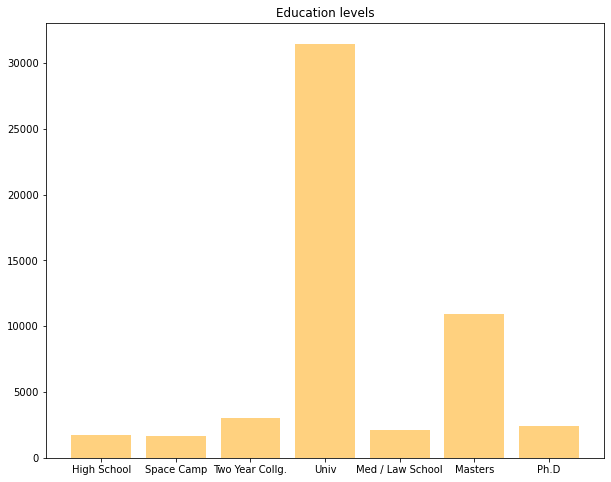

In [9]:
edu = profiles.groupby('education_clean')['age'].count().reset_index()
plt.close('all')
plt.figure(figsize = (10,8))
ax = plt.subplot(1,1,1)
plt.bar(edu['education_clean'], edu['age'], color = 'orange', alpha = 0.5)
plt.title('Education levels')
ax.set_xticks(range(1,8))
ax.set_xticklabels(['High School', 'Space Camp', 'Two Year Collg.', 'Univ', 'Med / Law School', 'Masters', 'Ph.D'])
plt.show()

Lets test the values for our newly created columns



In [10]:
print(profiles['drinks_ordinal'].value_counts())
print(profiles['sex_int'].value_counts())
print(profiles['orientation_int'].value_counts())
print(profiles['smokes_ordinal'].value_counts())
print(profiles['religion_clean'].value_counts())
print(profiles['religious_seriousness'].value_counts())
print(profiles['signs_clean'].value_counts())
print(profiles['education_clean'].value_counts())

2.0    41780
1.0     5957
3.0     5164
0.0     3267
4.0      471
5.0      322
Name: drinks_ordinal, dtype: int64
1    35829
0    24117
Name: sex_int, dtype: int64
0    51606
2     5573
1     2767
Name: orientation_int, dtype: int64
0.0    43896
2.0     3787
1.0     3040
4.0     2231
3.0     1480
Name: smokes_ordinal, dtype: int64
agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religion_clean, dtype: int64
No     32988
Yes     6732
Name: religious_seriousness, dtype: int64
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signs_clean, dtype: int64
4.0    31467
6.0    10920
3.0     3018
7.0     2408
5.0     2109
1.0     1713
2.0     1683
Name: educati

## Can we predict if someone will take religious faith seriously?

1. Based on Gender, Orientation, Education, drinks, drugs and smokes [Random Forest]

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

rf_df = profiles.dropna(subset = ['sex_int', 'orientation_int', 'education_clean', 'drinks_ordinal', 'drugs_ordinal', 'smokes_ordinal', 'religion_clean']).reset_index()
#print(rf_df.info())

train_data, test_data, train_labels, test_labels = train_test_split(rf_df[['sex_int', 'orientation_int', 'drinks_ordinal', 'drugs_ordinal', 'religion_int']], rf_df['religious_seriousness'], train_size = 0.8, test_size = 0.2, random_state = 1)

scores = []
trees = list(range(1,101))

for i in range (1,101) : 
    classifier = RandomForestClassifier(n_estimators = i)
    classifier.fit(train_data, train_labels)
    predictions = classifier.predict(test_data)
    score = classifier.score(test_data, test_labels)
    scores.append(score)

Our model predicts that the 6cm ball will bounce 3.5m.

Now, Reggie can use this model to predict the bounce of all kinds of sizes of balls he may choose to include in the ball pit!

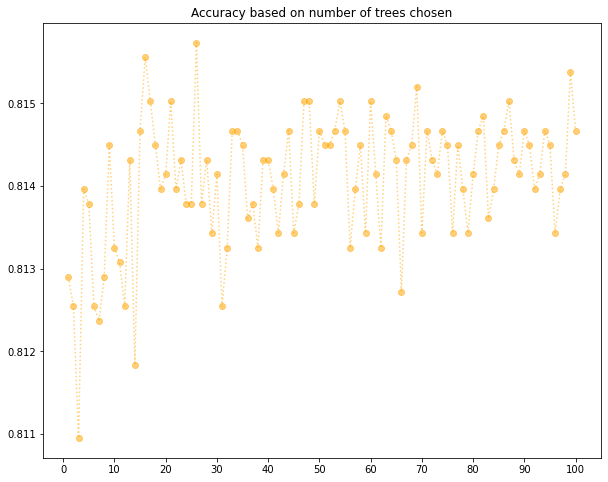

0.02629016553067186
0.3698630136986301


In [12]:
#Score improvements based on number of random trees chosen

plt.close('all')
plt.figure(figsize = (10,8))
ax5 = plt.subplot(1,1,1)
plt.plot(trees, scores, alpha = 0.5, color = 'orange', linestyle = ':', marker = 'o')
plt.title('Accuracy based on number of trees chosen')
ax5.set_xticks(range(0,101,10))
plt.show()

print(recall_score(test_labels, predictions, pos_label = 'Yes'))
print(precision_score(test_labels, predictions, pos_label = "Yes"))

## Can we predict sex based on content within essays?

In [13]:
#Predicting Sex based on essay content in essays.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

nb_df = profiles[["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9",'sex']]
nb_df = nb_df.replace(np.nan, '', regex = True)
nb_df['essays_all'] = nb_df[["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]].apply(lambda row : ' '.join(row), axis = 1)

train_data, test_data, train_labels, test_labels = train_test_split(nb_df['essays_all'], nb_df['sex'], train_size = 0.8, test_size = 0.2, random_state = 1)

counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)
predictions = classifier.predict(test_counts)
score_nb = classifier.score(test_counts, test_labels)

print(score_nb)

0.7307756463719767


In [14]:
print(f1_score(test_labels, predictions, pos_label = 'f'))

0.7055819044144472


## Can we predict income based on length of essay and avg. word length?

In [15]:
#Predicting Income based on average length

ml_df = profiles[["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9",'income', 'age']]

#Filling in empty essays with ''
ml_df.fillna(value = {'essay0' : '', 'essay1' : '','essay2' : '','essay3' : '','essay4' : '','essay5' : '','essay6' : '','essay7' : '','essay8' : '','essay9' : ''}, inplace = True)

#Joining all essays together and then finding length, word count and avg word length
ml_df['essays_all'] = ml_df[["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]].apply(lambda row : ' '.join(row), axis = 1)
ml_df['essays_len'] = ml_df['essays_all'].apply(lambda x : len(x))
ml_df['word_count'] = ml_df['essays_all'].str.count(' ') + 1
ml_df['avg_word_len'] = ml_df['essays_len'] / ml_df['word_count']
ml_df['freq_i_me'] = ml_df['essays_all'].str.count('\s[iI]\s|\s[mM]e\s')

print(ml_df.info())
print(ml_df['essays_all'].head())
print(ml_df['freq_i_me'].head())

C:\Users\ser\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-15-60850680b0b4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df['essays_all'] = ml_df[["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]].apply(lambda row : ' '.join(row), axis = 1)
<ipython-input-15-60850680b0b4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   essay0        59946 non-null  object 
 1   essay1        59946 non-null  object 
 2   essay2        59946 non-null  object 
 3   essay3        59946 non-null  object 
 4   essay4        59946 non-null  object 
 5   essay5        59946 non-null  object 
 6   essay6        59946 non-null  object 
 7   essay7        59946 non-null  object 
 8   essay8        59946 non-null  object 
 9   essay9        59946 non-null  object 
 10  income        59946 non-null  int64  
 11  age           59946 non-null  int64  
 12  essays_all    59946 non-null  object 
 13  essays_len    59946 non-null  int64  
 14  word_count    59946 non-null  int64  
 15  avg_word_len  59946 non-null  float64
 16  freq_i_me     59946 non-null  int64  
dtypes: float64(1), int64(5), object(11)
memory usage: 7.8+ MB
None
0    a

In [16]:
#Prepare the DF
multi_df = ml_df[['essays_len', 'avg_word_len','income']]
multi_df = multi_df[multi_df['income'] > 10].reset_index(drop=True)
print(multi_df.info())

#Prepare Train and Test Data
x_train, x_test, y_train, y_test = train_test_split(multi_df[['essays_len', 'avg_word_len']], multi_df['income'], train_size = 0.8, test_size = 0.2, random_state = 1)

#Normalising the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)

print(x_scaled_train)
print(x_scaled_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504 entries, 0 to 11503
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   essays_len    11504 non-null  int64  
 1   avg_word_len  11504 non-null  float64
 2   income        11504 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 269.8 KB
None
[[-0.51632298  0.10216655]
 [ 1.3486119  -0.03678009]
 [-0.64489499  0.0207469 ]
 ...
 [-0.24422872 -0.08073307]
 [ 1.4874355  -0.0147801 ]
 [ 3.25327168  0.13702706]]
[[-0.57740536  0.2096162 ]
 [ 0.71344054  0.03398281]
 [ 0.06801759  0.32814938]
 ...
 [-0.04175984 -0.00891686]
 [ 0.86294288  0.30278509]
 [-0.93236663 -0.49235272]]


In [17]:
from sklearn.linear_model import LinearRegression

my_model = LinearRegression()
my_model.fit(x_scaled_train, y_train)
guesses = my_model.predict(x_scaled_test)
print(my_model.score(x_scaled_train, y_train))
print(my_model.score(x_scaled_test, y_test))

#Scores are extremely low and hence length of essay and wordcount cannot be used to predict income.

0.003907412945515332
0.0013597515420864514


In [18]:
#Trying the scores using K Nearest neighbors.

from sklearn.neighbors import KNeighborsRegressor

my_model = KNeighborsRegressor(n_neighbors = 5, weights = 'uniform')
my_model.fit(x_scaled_train, y_train)
print(my_model.score(x_scaled_test, y_test))

-0.17951139282140738


## Can we predict age based on Frequency of 'I' and 'Me' in the essays?

In [19]:
#Train & Test Data
x = np.array(ml_df['freq_i_me']).reshape(-1,1)
print(x)

x_train, x_test, y_train, y_test = train_test_split(x, ml_df['age'], train_size = 0.8, test_size = 0.2, random_state = 1)

#Normalising the data

scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)


my_model = LinearRegression()
my_model.fit(x_scaled_train, y_train)
print(my_model.score(x_scaled_test, y_test))

#Scores are extremely low and liner regression cannot be applied to predict age based on the frequency of 'I' or me in essays

[[18]
 [20]
 [23]
 ...
 [11]
 [19]
 [29]]
0.0036377087137188235
